# Mental Health in Tech Industry Analysis 

Approximately 20% of adults are living with mental illnesses like depression, anxiety, bipolar disorder, or ADHD. Meanwhile, the tech industry is known for its stressful work environment, long hours, pressure to be constantly available, and balancing open-source work with personal time. With these factors blurring the lines between work and personal life, how can we ensure that those most susceptible to mental health challenges aren't left behind in this demanding industry?

<img src="https://img.freepik.com/premium-photo/human-brain-with-global-network-line-wire-frame-data-business-concept-banner-with-red-light-blue-background-3d-illustration_38364-278.jpg?w=740" style = "width : 800px;"/>



Mental health is one of the pressing issues that have been in the spotlight in recent years, as it affects not only the individuals but also the companies and society as a whole. 


## Objective
This notebook aim to shed light on the state of mental health from 2014 to 2019 in the industry and offer solutions for a healthier and more sustainable future.

The data presented here is sourced from Open Source Mental Illness (OSMI) surveys conducted between 2014 and 2019. These surveys were aimed at assessing people's perceptions of mental health and the prevalence of mental health disorders in the technology industry.

# **A first look on the data**


In [1]:
## Importing necessary libraries
import numpy as np 
import pandas as pd 
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


#Insert path here
path = "/kaggle/input/"  
dataset = path + 'mental-health-in-the-tech-industry/mental_health.sqlite'

# connect to SQL database
con = sql.connect(dataset) # create connection object to database


Understanding the number of survey respondents can provide valuable insights into the level of engagement and interest in this critical topic. In this section, we will explore the level of participation in each survey and analyze how the number of respondents has evolved over time.

Text(0.5, 0, 'SurveyID')

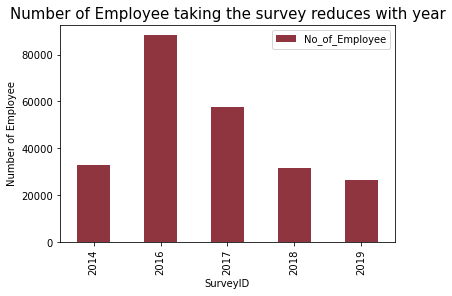

In [2]:
query = """
    SELECT 
        SurveyID,
        COUNT() AS No_of_Employee
    FROM Answer
    GROUP BY SurveyID;
"""
Employee_per_survey = pd.read_sql(query, con).astype({"No_of_Employee": int})

barplot = Employee_per_survey.plot.bar(x='SurveyID',y='No_of_Employee', color = '#7A111E', alpha = 0.85)
plt.title('Number of Employee taking the survey reduces with year', fontsize = 15)
plt.ylabel('Number of Employee')
plt.xlabel('SurveyID')



The number of respondents increased from 2014 to 2016 but then decreased in the following years. Let's take a closer look at the age distribution of employees who participated in the mental health surveys conducted between 2014 and 2019.

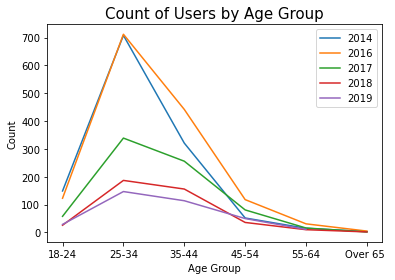

In [3]:
query = """

SELECT SurveyID, 
       CASE 
            WHEN AnswerText BETWEEN 18 AND 24 THEN '18-24'
            WHEN AnswerText BETWEEN 25 AND 34 THEN '25-34'
            WHEN AnswerText BETWEEN 35 AND 44 THEN '35-44'
            WHEN AnswerText BETWEEN 45 AND 54 THEN '45-54'
            WHEN AnswerText BETWEEN 55 AND 64 THEN '55-64'
            WHEN AnswerText BETWEEN 65 AND 99 THEN 'Over 65 '
        END AS age_group,  
    COUNT(*) AS count
FROM Answer
WHERE SurveyID IN (2014, 2016, 2017, 2018, 2019)
      AND QuestionID=1
      AND AnswerText > 18
      
GROUP BY SurveyID, age_group
ORDER BY SurveyID, age_group; 
"""
Age_Survey = pd.read_sql(query, con)
# Get a list of unique age groups in the dataframe
SurveyID_groups = Age_Survey['SurveyID'].unique()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot a line for each age group
for SurveyID_group in SurveyID_groups:
    ax.plot(Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'age_group'], Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'count'], label=SurveyID_group)

# Set the x and y axis labels
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Set the title of the plot
ax.set_title('Count of Users by Age Group',fontsize = 15)

# Show the legend
ax.legend()

# show graph
plt.show()

The data is divided into six age groups ranging from 18-24 to over 65, and each survey has a different count for each age group. The highest count is from the age group of 25-34 in each survey.

### Exploring Numbers and Possible Causes 

The dataset captures responses from 80 different countries, with the most responses coming from the USA (2604)! My focus will be on mental health in the tech industry in the USA. The butterfly bar chart is based on data from mental health surveys conducted by tech companies, and sheds light on the underrepresentation of women in the industry.

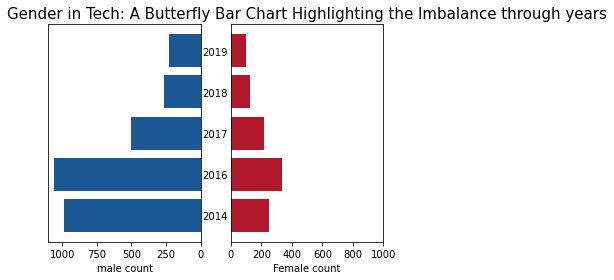

In [4]:
#Howevevr, because it is a readonly data we can not change text there to account for Country name we need to consider both united states and united states of america together

query = """
SELECT SurveyID, 
       SUM(CASE WHEN AnswerText = 'male' OR AnswerText = 'Male' THEN 1 ELSE 0 END) AS male_count,
       SUM(CASE WHEN AnswerText = 'female' OR AnswerText = 'Female'THEN 1 ELSE 0 END) AS female_count
FROM Answer
WHERE     QuestionID == 2 
      OR (QuestionID == 9 AND AnswerText == 1 ) 
      OR (QuestionID == 3 AND AnswerText =='United States of America' OR AnswerText =='United States')
GROUP BY SurveyID
"""
#Question 2: what is your gender?
#Question 9: Is your employer primarily a tech company/organization?
#Question 3: What country do you live in?
df=pd.read_sql(query, con)

pos = np.arange(len(df)) + .5 # bars centered on the y axis

fig, (ax_left, ax_right) = plt.subplots(ncols=2)

ax_left.barh(pos, df['male_count'], align='center', facecolor='#1C5894')

ax_left.set_xlim((0,1100))

ax_left.set_yticks([])

ax_left.set_xlabel('male count')

ax_left.invert_xaxis()

ax_right.barh(pos, df['female_count'], align='center', facecolor='#B2182B')

ax_right.set_xlim((0,1000))

ax_right.set_yticks(pos)

ax_right.set_yticklabels(df['SurveyID'].values, ha='center', x=-0.06)

ax_right.set_xlabel('Female count')

plt.title('Gender in Tech: A Butterfly Bar Chart Highlighting the Imbalance through years',fontsize = 15)

plt.tick_params(left = False)

plt.show()

This data provides a breakdown of **the number of employees who took part in the mental health survey, organized by state and year**, from 2016 to 2019.

In [5]:

query = """
SELECT year, state, COUNT(*) AS Employee_count
FROM (
 SELECT UserID,SurveyID AS year,
        MAX(CASE WHEN QuestionID == 4  THEN AnswerText END) AS state,
        MAX(CASE WHEN (QuestionID == 5  AND AnswerText !=1)  THEN AnswerText END) AS Self_Employed,
        MAX(CASE WHEN QuestionID == 13  THEN AnswerText END) AS Tech_company,
        COUNT (*) as count

 FROM Answer
 WHERE   QuestionID == 4  AND AnswerText !=-1
         OR (QuestionID == 5  )
         OR (QuestionID == 13 AND AnswerText == 1 ) 
GROUP BY UserID
HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
       AND Tech_company IS NOT NULL
)

GROUP BY year, state
ORDER BY year
"""
#Question 4 which state ? remove -1 (outside USA)
#Question 5 are you self employed
#Question 9: Is your employer primarily a tech company/organization?

df=pd.read_sql(query, con)

state_appreviation = pd.read_csv('/kaggle/input/states/stateAPP1.csv')
state_appreviation = state_appreviation.applymap(lambda x: x.strip() if isinstance(x, str) else x)
merged_df = pd.merge(df, state_appreviation ,on="state")

fig = px.choropleth(merged_df,
                    locations="StateCode",
                    locationmode="USA-states",
                    color="Employee_count", 
                    hover_name = "Employee_count",
                    color_continuous_scale =px.colors.sequential.Reds,
                    animation_frame="year",
                    scope="usa"
               )

fig.update_layout(
    title={
        'text':"Number of Employees who took the survey by State ",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

# **Analysing the data**

Let's explore the prevalence of mental health issues in the tech industry and compare it to other industries - **how do the numbers stack up and what does this mean for employee well-being and the companies they work for?**

In [6]:
query = """

SELECT year,company_type,
        COUNT(Mental_Health) AS total_Mental_Health, 
        SUM(Mental_Health) AS have_Mental_Health, 
        100.0*SUM(Mental_Health)/COUNT(Mental_Health) AS Percentage
FROM (
    SELECT SurveyID AS year,
            MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
            MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN AnswerText END) AS Self_Employed,     
            MAX(CASE WHEN (QuestionID == 13 AND AnswerText == 1) THEN 'Tech_company' ELSE 'Other_company' END) AS company_type,
            MAX(CASE WHEN (QuestionID == 33 AND AnswerText == 'Yes') THEN 1 ELSE 0 END) AS Mental_Health
    FROM Answer
    WHERE QuestionID IN (4,5,13, 33) AND year != 2014
    GROUP BY year, UserID
    HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
) AS mh_data
GROUP BY year,company_type;

"""
df = pd.read_sql(query, con)

#Question 4 which state ? remove -1 (outside USA)
#Question 5 are you self employed
#Question 13 Is your primary role within your company related to tech/IT?
#Question 33 Do you currently have a mental health disorder?

# Create a trace for the bar chart of total mental health
trace1 = go.Bar(
    x=df[df['company_type'] == 'Other_company']['year'],
    y=df[df['company_type'] == 'Other_company']['total_Mental_Health'],
    name='Other Company', marker_color= '#D6604D'
)

trace2 = go.Bar(
    x=df[df['company_type'] == 'Tech_company']['year'],
    y=df[df['company_type'] == 'Tech_company']['total_Mental_Health'],
    name='Tech Company',marker_color= '#4393C3'
)

# Create a trace for the line chart of percentage of users with mental health
trace3 = go.Scatter(
    x=df[df['company_type'] == 'Other_company']['year'],
    y=df[df['company_type'] == 'Other_company']['Percentage'],
    name='Other Company',
    yaxis='y2',marker_color= '#B2182B'
)

trace4 = go.Scatter(
    x=df[df['company_type'] == 'Tech_company']['year'],
    y=df[df['company_type'] == 'Tech_company']['Percentage'],
    name='Tech Company',
    yaxis='y2',marker_color= '#2166AC'
)

# Define the layout
layout = go.Layout(
    title='Mental Health Comparison by role',
    yaxis=dict(title='Total number of employees'),
    yaxis2=dict(
        title='Percentage of Users with Mental Health',
        overlaying='y',
        side='right',
        range=[0, 100]
    ),
    barmode='group'
)

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

# Show the figure
fig.show()

This bar chart is showing the total number of employee in each company type and its relavent percentage of employee with mental health is shown in a line chart. You can hover over the bars and lines to see the exact values and zoom in/out to see more details.

The data shows a consistent percentage of employees reporting mental health issues across the years, with a slightly higher percentage in tech companies than in other companies in 2016 and 2017. However, the percentage became relatively similar in 2018 and 2019. Self-reported data and other factors like work culture and mental health resources could affect the accuracy of the findings.

The main question here is how can we identify the source of the reported mental health percentage in the tech industry and **determine if it is related to genetic illnesses rather than workplace stress?** 

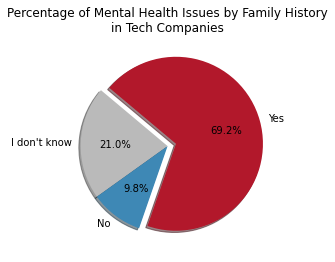

In [7]:
query = """

SELECT family_history, 
       100.0 * COUNT(family_history) / SUM(COUNT(family_history)) OVER () AS percentage
FROM (
    SELECT SurveyID AS year,
            MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
            MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN AnswerText END) AS Self_Employed,     
            MAX(CASE WHEN (QuestionID == 13 AND AnswerText == 1) THEN 'Tech_company' END) AS tech_company,
            MAX(CASE WHEN (QuestionID == 33 AND AnswerText == 'Yes') THEN 1 END) AS Mental_Health,
            MAX(CASE WHEN (QuestionID == 6 ) THEN AnswerText END) AS family_history

    FROM Answer
    WHERE QuestionID IN (4,5,6, 13, 33) AND year != 2014
    GROUP BY year, UserID
    HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
       AND tech_company IS NOT NULL
       AND Mental_Health IS NOT NULL
) 
GROUP BY  family_history

"""
df = pd.read_sql(query, con)

colors = ["#BABABA", "#3E88B5", "#B2182B"]
explode = (0, 0, 0.1)  
plt.pie(df["percentage"], labels=df["family_history"], explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Mental Health Issues by Family History\n"+"in Tech Companies")
plt.show()

Based on the given data, 69.2% of employees in the tech industry who suffer from mental health issues have a family history of mental health. This suggests that genetic factors may play a significant role in the prevalence of mental health issues among employees in the tech industry. Furthermore, it is noteworthy that a significant proportion of employees (21%) were unsure if they had a family history of mental health, which could indicate a lack of awareness or knowledge about their family's mental health history.

This graph presents data on the availability of mental health benefits as part of healthcare coverage among employees. It highlights **the percentage of employees who reported that their employer provides such benefits, as well as those who reported that their employer does not provide mental health benefits**.

In [8]:
#the highest state those surveyes coming from and self employment 
#map chart

query = """
SELECT year, state, 
      (COUNT(Mental_Health_benfits)*100.0/COUNT(*)) AS MH_Benefits
FROM (
 SELECT UserID,SurveyID AS year,
        MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
        MAX(CASE WHEN (QuestionID == 5   AND AnswerText !=1) THEN AnswerText END) AS Self_Employed,
        MAX(CASE WHEN (QuestionID == 9 AND AnswerText == 1) THEN AnswerText END) AS Tech_company,
        MAX(CASE WHEN (QuestionID == 10 AND AnswerText LIKE '%Yes%') THEN  1 END) AS Mental_Health_benfits,

        COUNT (*) as count

 FROM Answer
 WHERE   (QuestionID IN (4, 5,7,9, 10) )

         
GROUP BY UserID
HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
       AND Tech_company IS NOT NULL   
)
GROUP BY year, state
ORDER BY year
"""
#Question 4 which state ? remove -1 (outside USA)
#Question 5 are you self employed
#Question 7: how many 
#Question 9: Is your employer primarily a tech company/organization?


df = pd.read_sql(query, con)
merged_df = pd.merge(df, state_appreviation ,on="state")
fig = px.choropleth(merged_df,
                    locations="StateCode",
                    locationmode="USA-states",
                    color="MH_Benefits", 
                    hover_name = "MH_Benefits",
                    color_continuous_scale=px.colors.sequential.Reds,
                    animation_frame="year",
                    scope="usa"
               )

fig.update_layout(
    title={
        'text': 'Percentage of Mental Health Benefits Provided by Employers in US States',
        'y':0.95,
        'x':0.1,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()


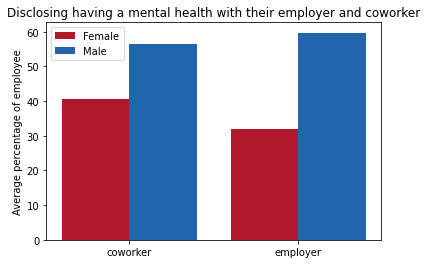

In [9]:
#What percentage of employees have disclosed having a mental health disorder to their employer or coworkers?
#We can find the answer by analysing question 58 and 60
#Question 58: Have you ever discussed your mental health with your employer?
#Question 60: Have you ever discussed your mental health with coworkers?

query = """
SELECT Discuss,
       (COUNT(female)*100.0/COUNT()) AS female_Percentage,
       (COUNT(male)*100.0/COUNT()) AS male_Percentage
FROM (
 SELECT UserID,SurveyID AS year,
        MAX(CASE WHEN (QuestionID == 2 AND AnswerText LIKE '%emale%') THEN 1 END) AS female,
        MAX(CASE WHEN (QuestionID == 2 AND AnswerText == 'male' OR AnswerText == 'Male' ) THEN 1 END) AS male,
        MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
        MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN AnswerText END) AS Self_Employed,
        MAX(CASE WHEN (QuestionID == 13  AND AnswerText == 1) THEN AnswerText END) AS Tech_company,
    COALESCE(
        MAX(CASE WHEN (QuestionID = 58 AND AnswerText = 1) THEN 'employer'  END),
        MAX(CASE WHEN (QuestionID = 60 AND AnswerText = 1) THEN 'coworker'  END)
    ) AS Discuss,

        COUNT (*) as count

 FROM Answer
 WHERE   QuestionID == 4 
         OR QuestionID IN (2,4,5,13, 58,60) 

         
GROUP BY UserID
HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
       AND Tech_company IS NOT NULL  
)
WHERE year IN (2017, 2018, 2019) AND Discuss != 'None'
GROUP BY Discuss 
    
"""
#Question2: what is your gender?
#Question 4 which state ? to limit the analysis inside the USA
#Question 5 are you self employed?  to limit the analysis to companies
#Question 9: Is your employer primarily a tech company/organization? to limit to tech

df = pd.read_sql(query, con)
X_axis = np.arange(len(df['Discuss']))

plt.bar(X_axis - 0.2, df['female_Percentage'], 0.4, label = 'Female', color = "#B2182B")
plt.bar(X_axis + 0.2, df['male_Percentage'], 0.4, label = 'Male', color = "#2166AC")
plt.xticks(X_axis, df['Discuss'])
plt.ylabel("Average percentage of employee")
plt.title("Disclosing having a mental health with their employer and coworker")
#plt.subtitle("The average percentage of employees disclosing having a mental health disorder to their employer and coworker")
plt.legend()
plt.show()
#Are women more likely than men to report experiencing mental health symptoms?


It seems that there are fewer females in both coworker and employer roles compared to males. The percentage of females in coworker roles is lower than that in employer roles. These findings suggest that there may be a gender disparity in the workplace that needs to be addressed.

In [10]:
query = """
SELECT Comfortance,
    SUM(CASE year WHEN 2017 THEN percentage END) AS Y2017,
    SUM(CASE year WHEN 2018 THEN percentage END) AS Y2018,
    SUM(CASE year WHEN 2019 THEN percentage END) AS Y2019
FROM (
    SELECT year, Comfortance,
        COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY year) AS percentage
    FROM (
        SELECT SurveyID AS year, 
        MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN 1 END) AS state,
        MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN 1 END) AS Self_Employed,
        MAX(CASE WHEN (QuestionID == 13  AND AnswerText == 1) THEN AnswerText END) AS Tech_company,
        MAX(CASE WHEN (QuestionID == 57) THEN AnswerText END) AS Comfortance,
        COUNT (*) as count
        
        FROM Answer
        WHERE QuestionID IN (4, 5, 13, 57)
        GROUP BY UserID, SurveyID
        HAVING state IS NOT NULL
               AND Self_Employed IS NOT NULL
               AND Tech_company IS NOT NULL 
    ) AS t
    GROUP BY year, Comfortance
) AS t2

GROUP BY Comfortance

"""

df = pd.read_sql(query, con)
comfortance_colors = {
    'Mental health': '#2166AC',
    'Physical health': '#D6604D',
    'Same level of comfort for each': '#FFDAB9'
}

# Create a list of colors for each value in the 'Comfortance' column
colors = [comfortance_colors[x] for x in df['Comfortance'].dropna()]
# Set the colors for the pie chart
#colors = ['#FFDAB9', '#D6604D', '#2166AC']

# Create the figure
fig = go.Figure()

# Add the traces for each year
for year in df.columns[1:]:
    # Filter out the NaN values
    data = df[['Comfortance', year]].dropna()
    fig.add_trace(go.Pie(labels=data['Comfortance'],
                         values=data[year], 
                         hole=.5,
                         name=str(year), 
                         marker_colors=colors))

# Update the layout
fig.update_layout(
    title="Comfort Levels for Mental and Physical Health Discussions",
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list([
            dict(label="Y2017",
                 method="update",
                 args=[{"visible": [True, False, False]},
                       {"title": "Comfort Levels for Mental and Physical Health Discussions in 2017",'showactive':True}]),
            dict(label="Y2018",
                 method="update",
                 args=[{"visible": [False, True, False]},
                       {"title": "Comfort Levels for Mental and Physical Health Discussions in 2018",'showactive':True}]),
            dict(label="Y2019",
                 method="update",
                 args=[{"visible": [False, False, True]},
                       {"title": "Comfort Levels for Mental and Physical Health Discussions in 2019",'showactive':True}])
        ])
    )
])
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Show the plot
fig.show()

While the percentage of respondents who reported feeling comfortable discussing physical health issues continued to increase. Therefore, there is not enough information to draw a clear conclusion about the trend in comfort level for mental health discussions over time.

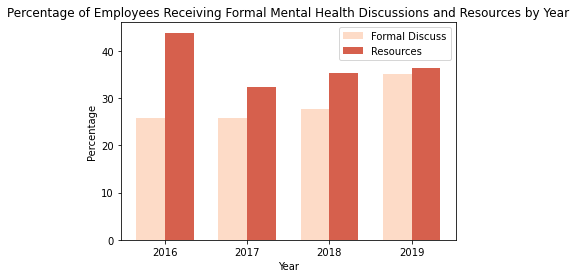

In [11]:
#Question 15: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
#Question 16: Does your employer offer resources to learn more about mental health disorders and options for seeking help?

query = """
SELECT year, 
       (COUNT(discussed_MH)*100.0 / COUNT(*)) AS discussed_MH_Percentage,
              (COUNT(resources)*100.0 / COUNT(*)) AS resources_Percentage
FROM (
 SELECT UserID,SurveyID AS year,
        MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
        MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN AnswerText END) AS Self_Employed,
        MAX(CASE WHEN (QuestionID == 13  AND AnswerText == 1) THEN AnswerText END) AS Tech_company,
        MAX(CASE WHEN (QuestionID == 15 AND AnswerText == 'Yes') THEN 1 END) AS discussed_MH,
        MAX(CASE WHEN (QuestionID == 16 AND AnswerText == 'Yes') THEN 1 END) AS resources,  
        COUNT (*) as count

 FROM Answer
 WHERE   QuestionID IN (4,5,13,15,16) 

         
GROUP BY UserID
HAVING state IS NOT NULL
       AND Self_Employed IS NOT NULL
       AND Tech_company IS NOT NULL  
)
GROUP BY year

"""
df = pd.read_sql(query, con)

fig, ax = plt.subplots()
x = np.arange(len(df['year']))
width = 0.35
rects1 = ax.bar(x - width/2, df['discussed_MH_Percentage'], width, label='Formal Discuss', color = '#FDDBC7')
rects2 = ax.bar(x + width/2, df['resources_Percentage'], width, label='Resources', color = '#D6604D')

# Add labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Employees Receiving Formal Mental Health Discussions and Resources by Year')
ax.set_xticks(x)
ax.set_xticklabels(df['year'])
ax.legend()

# Display the chart
plt.show()

Looking at the stacked bar chart, we can see that the Comfortance Percentage has increased from 25.8% in 2016 to 35.1% in 2019, while the Resources Percentage has remained relatively stable, fluctuating between 32.5% and 36.3%.

One possible interpretation of this data is that while employers are becoming more comfortable discussing mental health with their employees, they are not necessarily providing more resources to help employees learn about mental health disorders and seek help. This could be a potential area for improvement for employers looking to promote mental health in the workplace.

Another interesting point to note is that the most common source of discomfort in discussing mental health is with regards to mental health specifically, as opposed to physical health or a consistent level of comfort across all health topics. This highlights the need for employers to specifically address mental health in their wellness programs and communication efforts.

Overall, this data suggests that while progress is being made in terms of employers' willingness to discuss mental health, there is still work to be done in terms of providing resources and support for employees.
